# Audible App Machine Learning Predictions

In [133]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import sklearn

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree

## Dataset: dataset_Exploded.csv¶

Initial Source: Rohit Dass (6/14/2021). "Audible Dataser", https://www.kaggle.com/rohitdass/audible-dataset.

Description: Initial full dataset for audible dataset recommendation engine. Total books 2200+(Including Duplicates).
             Then, using pandas 100 random human demographics were generated and merged to the initial source. The                          generated demographics were then merged to the initial source to create the "dataset_Exploded" dataset. After this              final dataset was cleaned. 

Variables/Columns GENDER: Gender Male or Female AGE: Age Range 18-75 ZIP CODE: random 5 digit in 80201,80239 range INCOME: <200000K



In [2]:
# Read the csv file into a pandas DataFrame

audible= pd.read_csv('dataset_Exploded.csv')
audible.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Categories Encoded,Rating,Total No. of Ratings,Price,Review,Gender,Age,Income,ZipCode,Profession
0,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Female,67,102000,80207,Industrial Engineer
1,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Female,67,102000,80236,Electrical Engineer
2,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Female,65,111200,80217,Nurse Practitioner
3,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Male,52,107040,80226,Physician Assistant
4,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,24.95,High,Male,50,116000,80229,Computer Hardware Engineer


In [22]:
tmp = audible[['Categories', 'Gender_Female', 'Rating', 'ZipCode']]
tmp.dtypes
pd.get_dummies(tmp)

,Gender_Female,Rating,ZipCode,Categories_Arts & Entertainment,Categories_Biographies & Memoirs,Categories_Business & Careers,Categories_Children's Audiobooks,Categories_Computers & Technology,Categories_Education & Learning,Categories_Erotica,...,Categories_Money & Finance,"Categories_Mystery, Thriller & Suspense",Categories_Politics & Social Sciences,"Categories_Relationships, Parenting & Personal Development",Categories_Religion & Spirituality,Categories_Romance,Categories_Science & Engineering,Categories_Science Fiction & Fantasy,Categories_Teen,Categories_Travel & Tourism
0,1,4.9,80207,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.9,80236,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4.9,80217,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4.9,80226,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.9,80229,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192795,0,4.6,80204,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192796,1,4.6,80215,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192797,0,4.6,80214,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192798,1,4.6,80223,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# Use dummies encoded to create binary data from gender
#data = X.copy()
audible = pd.get_dummies(audible)
audible

,Categories Encoded,Rating,Total No. of Ratings,Price,Age,Income,ZipCode,Gender_Female,Review_High,Review_Low,...,Categories_Money & Finance,"Categories_Mystery, Thriller & Suspense",Categories_Politics & Social Sciences,"Categories_Relationships, Parenting & Personal Development",Categories_Religion & Spirituality,Categories_Romance,Categories_Science & Engineering,Categories_Science Fiction & Fantasy,Categories_Teen,Categories_Travel & Tourism
0,7,4.9,182445,24.95,67,102000,80207,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7,4.9,182445,24.95,67,102000,80236,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7,4.9,182445,24.95,65,111200,80217,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7,4.9,182445,24.95,52,107040,80226,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,7,4.9,182445,24.95,50,116000,80229,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192795,22,4.6,4254,28.00,47,106000,80204,0,0,1,...,0,0,0,0,0,0,0,0,0,1
192796,22,4.6,4254,28.00,42,100200,80215,1,0,1,...,0,0,0,0,0,0,0,0,0,1
192797,22,4.6,4254,28.00,59,105600,80214,0,0,1,...,0,0,0,0,0,0,0,0,0,1
192798,22,4.6,4254,28.00,33,94000,80223,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Drop extra dummy columns
audible= audible.drop(columns=['Gender_Male'])
feature_names = audible.columns
audible.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Categories Encoded,Rating,Total No. of Ratings,...,Profession_Public Relations Specialist,Profession_Real Estate Broker,Profession_Real Estate Sales Agent,Profession_Registered Nurse,Profession_Security Guard,Profession_Software Developer,Profession_Speech-Language Pathologist,Profession_Warhouse Packer,Profession_Welder,Profession_Wholesale
0,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
1,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
2,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
3,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0
4,Born a Crime,Stories from a South African Childhood,Trevor Noah,Trevor Noah,8 hrs and 44 mins,Unabridged Audiobook,Arts & Entertainment,7,4.9,182445,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Set features. This will also be used as your x values.
selected_features = audible[['Rating', 'Total No. of Ratings', 'Price',
       'Age', 'Income', 'ZipCode', 'Gender_Female']]
X_values= selected_features
X_values.head()
print(X_values.shape)

(192800, 7)


In [136]:
selected_features.head()

,Rating,Total No. of Ratings,Price,Age,Income,ZipCode,Gender_Female
0,4.9,182445,24.95,67,102000,80207,1
1,4.9,182445,24.95,67,102000,80236,1
2,4.9,182445,24.95,65,111200,80217,1
3,4.9,182445,24.95,52,107040,80226,0
4,4.9,182445,24.95,50,116000,80229,0


# Scaling and Normalization with top five book categories

## Book Category: Arts & Entertainment

In [105]:
X = audible[["Gender_Female", "Age", "Rating", "Total No. of Ratings", "ZipCode"]]
y = audible["Categories_Literature & Fiction"].values.reshape(-1, 1)
print(X.shape, y.shape)

(192800, 5) (192800, 1)


In [106]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4)
X_train.head()

,Gender_Female,Age,Rating,Total No. of Ratings,ZipCode
177449,1,62,4.9,446,80224
52333,1,19,4.2,5,80219
15198,1,66,4.4,12274,80204
102711,1,25,4.4,725,80224
26933,1,27,4.6,4811,80213


In [107]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [108]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [109]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

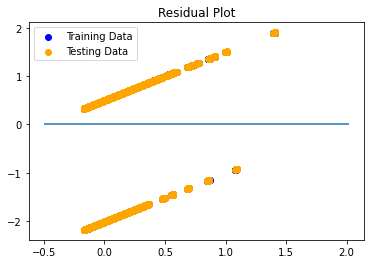

In [110]:
 #Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [111]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9736421937217896, R2: 0.02167034337835605


k: 1, Train/Test Score: 0.999/0.745
k: 3, Train/Test Score: 0.870/0.776
k: 5, Train/Test Score: 0.843/0.788
k: 7, Train/Test Score: 0.831/0.794
k: 9, Train/Test Score: 0.825/0.797
k: 11, Train/Test Score: 0.820/0.798
k: 13, Train/Test Score: 0.817/0.799
k: 15, Train/Test Score: 0.815/0.801
k: 17, Train/Test Score: 0.813/0.801
k: 19, Train/Test Score: 0.812/0.802


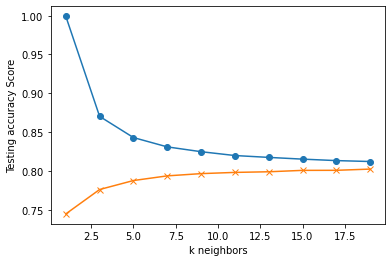

In [112]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [113]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.797


### Book Category: Business & Careers

In [66]:
X = audible[["Gender_Female", "Age", "Rating", "Total No. of Ratings", "ZipCode"]]
y = audible["Categories_Business & Careers"].values.reshape(-1, 1)
print(X.shape, y.shape)

(192800, 5) (192800, 1)


In [67]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4)
X_train.head()

,Gender_Female,Age,Rating,Total No. of Ratings,ZipCode
150412,0,21,4.6,280,80229
110971,1,72,4.2,1364,80219
55490,0,41,3.3,58,80232
1649,0,36,4.4,1718,80210
3616,1,36,4.8,1155,80231


In [68]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [69]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [70]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

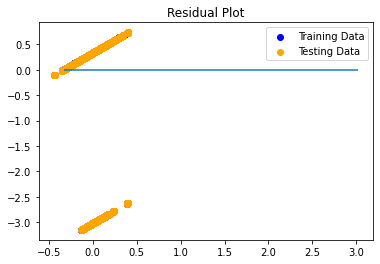

In [71]:
 #Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [72]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0043535424796144, R2: 0.0020559381562487156


k: 1, Train/Test Score: 0.999/0.832
k: 3, Train/Test Score: 0.917/0.879
k: 5, Train/Test Score: 0.907/0.892
k: 7, Train/Test Score: 0.903/0.897
k: 9, Train/Test Score: 0.902/0.899
k: 11, Train/Test Score: 0.902/0.899
k: 13, Train/Test Score: 0.902/0.900
k: 15, Train/Test Score: 0.901/0.900
k: 17, Train/Test Score: 0.901/0.900
k: 19, Train/Test Score: 0.901/0.900


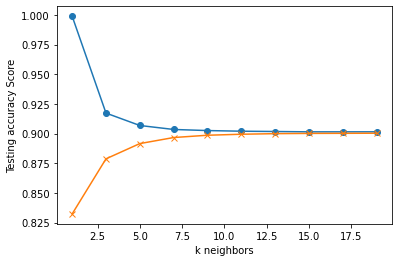

In [73]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [74]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.900


### Book Category: Health & Wellness

In [75]:
X = audible[["Gender_Female", "Age", "Rating", "Total No. of Ratings", "ZipCode"]]
y = audible["Categories_Health & Wellness"].values.reshape(-1, 1)
print(X.shape, y.shape)

(192800, 5) (192800, 1)


In [76]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4)
X_train.head()

,Gender_Female,Age,Rating,Total No. of Ratings,ZipCode
160187,1,74,4.8,14,80214
190722,0,26,4.9,6060,80213
104429,1,20,4.3,6709,80215
15567,1,22,4.0,4,80221
25679,1,57,4.8,693,80220


In [77]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [78]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [79]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

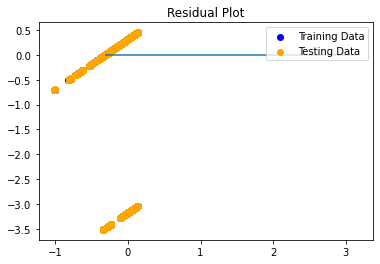

In [80]:
 #Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [81]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9965484174142907, R2: 0.013849156162507814


k: 1, Train/Test Score: 0.999/0.847
k: 3, Train/Test Score: 0.924/0.888
k: 5, Train/Test Score: 0.915/0.900
k: 7, Train/Test Score: 0.912/0.905
k: 9, Train/Test Score: 0.910/0.906
k: 11, Train/Test Score: 0.910/0.908
k: 13, Train/Test Score: 0.910/0.908
k: 15, Train/Test Score: 0.910/0.908
k: 17, Train/Test Score: 0.910/0.909
k: 19, Train/Test Score: 0.910/0.908


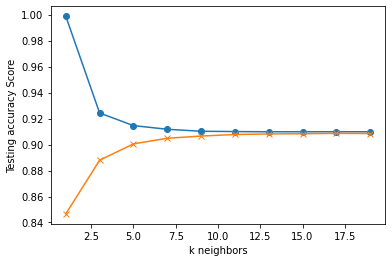

In [82]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [83]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.909


### Book Categories: SciFi & Fantasy

In [84]:
X = audible[["Gender_Female", "Age", "Rating", "Total No. of Ratings", "ZipCode"]]
y = audible["Categories_Science Fiction & Fantasy"].values.reshape(-1, 1)
print(X.shape, y.shape)

(192800, 5) (192800, 1)


In [85]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4)
X_train.head()

,Gender_Female,Age,Rating,Total No. of Ratings,ZipCode
71849,1,22,4.5,426,80211
23751,0,47,4.7,3550,80203
140407,0,44,4.7,2505,80221
99319,0,71,4.2,390,80218
191361,0,58,4.5,40,80237


In [86]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [98]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [88]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

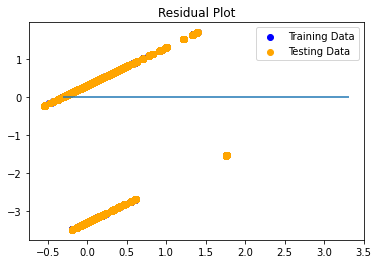

In [89]:
 #Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [90]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9995794936004384, R2: 0.021477544740150956


k: 1, Train/Test Score: 0.999/0.870
k: 3, Train/Test Score: 0.935/0.902
k: 5, Train/Test Score: 0.925/0.910
k: 7, Train/Test Score: 0.921/0.912
k: 9, Train/Test Score: 0.920/0.913
k: 11, Train/Test Score: 0.919/0.914
k: 13, Train/Test Score: 0.919/0.914
k: 15, Train/Test Score: 0.919/0.914
k: 17, Train/Test Score: 0.918/0.915
k: 19, Train/Test Score: 0.918/0.915


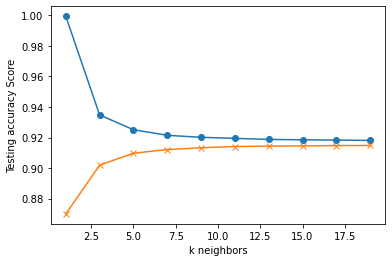

In [91]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [92]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.915


### Book Categories: Biography

In [95]:
X = audible[["Gender_Female", "Age", "Rating", "Total No. of Ratings", "ZipCode"]]
y = audible["Categories_Biographies & Memoirs"].values.reshape(-1, 1)
print(X.shape, y.shape)

(192800, 5) (192800, 1)


In [96]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4)
X_train.head()

,Gender_Female,Age,Rating,Total No. of Ratings,ZipCode
145708,1,63,4.6,2219,80214
188007,0,53,4.8,43840,80232
46024,0,24,4.3,6,80210
123975,1,57,4.8,18014,80223
63423,1,43,4.7,1415,80238


In [97]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [99]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [100]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

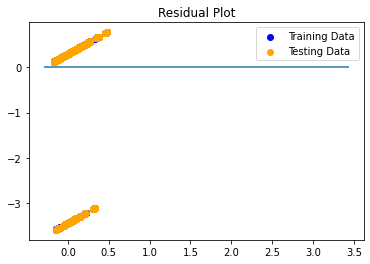

In [101]:
 #Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [102]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.988566810306111, R2: 0.0018210178488410333


k: 1, Train/Test Score: 1.000/0.873
k: 3, Train/Test Score: 0.936/0.909
k: 5, Train/Test Score: 0.928/0.919
k: 7, Train/Test Score: 0.925/0.922
k: 9, Train/Test Score: 0.924/0.923
k: 11, Train/Test Score: 0.923/0.923
k: 13, Train/Test Score: 0.923/0.923
k: 15, Train/Test Score: 0.923/0.923
k: 17, Train/Test Score: 0.923/0.923
k: 19, Train/Test Score: 0.923/0.923


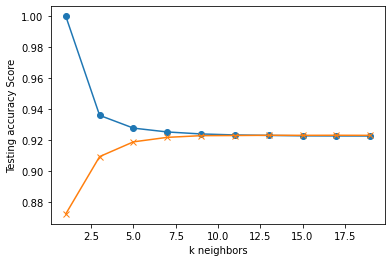

In [103]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [115]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.801


# User High Review Demographic Importance

### Used Random Forest to classify the feature, demographic importances based on high reviews

In [151]:
target = audible["Review_High"]
target_names = ["negative", "positive"]

In [152]:
data = selected_features
feature_names = data.columns
data.head()

,Rating,Total No. of Ratings,Price,Age,Income,ZipCode,Gender_Female
0,4.9,182445,24.95,67,102000,80207,1
1,4.9,182445,24.95,67,102000,80236,1
2,4.9,182445,24.95,65,111200,80217,1
3,4.9,182445,24.95,52,107040,80226,0
4,4.9,182445,24.95,50,116000,80229,0


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [154]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8489211618257262

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9161203319502075

In [156]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.23042211528312373, 'ZipCode'),
 (0.20890710948277524, 'Total No. of Ratings'),
 (0.15655149680692917, 'Price'),
 (0.1277674953490228, 'Age'),
 (0.12484754408711196, 'Income'),
 (0.11439562036594908, 'Rating'),
 (0.03710861862508806, 'Gender_Female')]

# Category: Literature & Fitness Demographic Importance

In [161]:
target = audible["Categories_Literature & Fiction"]
target_names = ["negative", "positive"]

selected_features = audible[['Age', 'Income', 'ZipCode', 'Gender_Female']]
data = selected_features
feature_names = data.columns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8037759336099585

In [162]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6843978723129087, 'ZipCode'),
 (0.12332081854088081, 'Age'),
 (0.11837547292371085, 'Income'),
 (0.07390583622249976, 'Gender_Female')]